In [1]:
pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install gensim


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing necessary python modules

In [4]:
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for creating visualizations
import numpy as np # library for numerical computing
import seaborn as sns # for statistical data visualization
sns.set(color_codes=True) # to allow for colorful visualization
import codecs # for reading and writing to different encodings
import re # regular expression (re) module for string pattern matching and manipulation
import copy # for generic copy operations
import collections
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from __future__ import division
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim.models import Word2Vec
from string import punctuation

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\stean\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\stean\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\stean\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\stean\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\stean\AppData\Roaming\nltk_data...
[

True

Importing the datasets

In [6]:
drugdatatrain = pd.read_csv('drugLibTrain_raw.csv')
drugdatatest= pd.read_csv('drugLibTest_raw.csv')

Viewing the datasets

In [7]:
drugdatatrain

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [8]:
drugdatatest

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...
...,...,...,...,...,...,...,...,...,...
1031,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


Cleaning and preprocessing

In [9]:
### Dropping the unamed role as I dont see its purpose
drugdatatrain = drugdatatrain.drop(columns=['Unnamed: 0'])
drugdatatest = drugdatatest.drop(columns=['Unnamed: 0'])

In [10]:
### Checking for NAs in training data set
drugdatatrain.isna().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [11]:
### Checking for NAs in test data set
drugdatatest.isna().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
dtype: int64

In [12]:
### removing NAs in training dataset, the test dataset has no NAs
drugdatatrain=drugdatatrain.dropna()

### Explorative Data Analysis

Bar chart to see the effectiveness levels of our drugs on customers

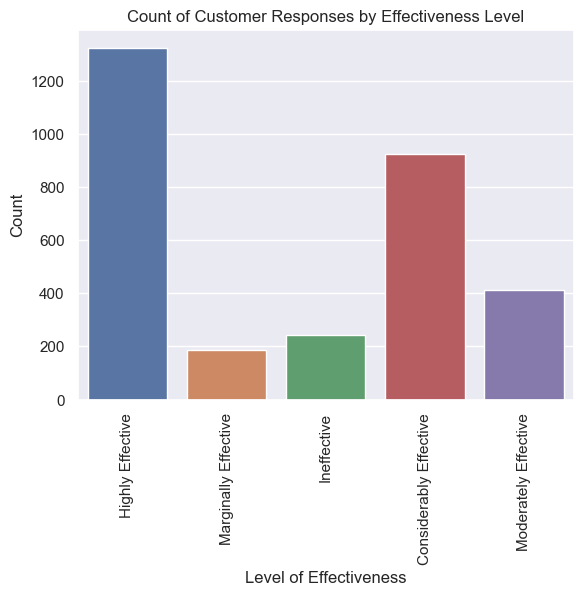

In [13]:
# Plotting the bar chart
sns.countplot(x='effectiveness', data=drugdatatrain)

plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Level of Effectiveness')
plt.ylabel('Count')
plt.title('Count of Customer Responses by Effectiveness Level')

# Showing the plot
plt.show()

Reordering the effectiveness level

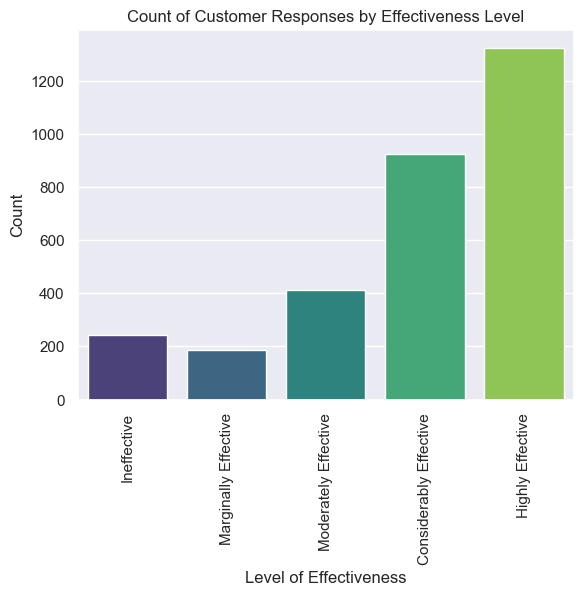

In [14]:
# Defining the order of effectiveness levels
effectiveness_order = [
    'Ineffective', 
    'Marginally Effective', 
    'Moderately Effective', 
    'Considerably Effective', 
    'Highly Effective'
]

# Plotting the bar chart
sns.countplot(x='effectiveness', data=drugdatatrain, order=effectiveness_order, palette='viridis')

plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Level of Effectiveness')
plt.ylabel('Count')
plt.title('Count of Customer Responses by Effectiveness Level')

# Showing the plot
plt.show()

Distribution of Side Effects Across Effectiveness Levels with a clustered bar chart

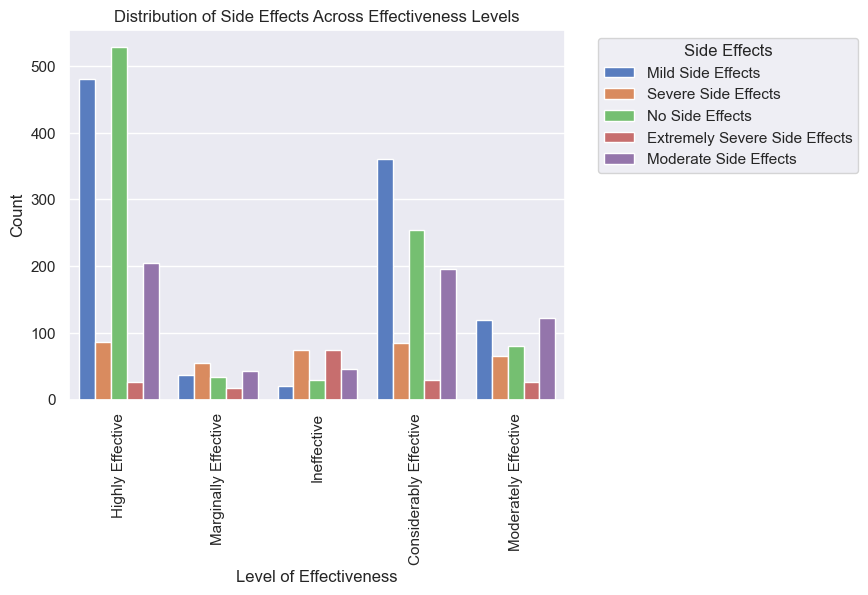

In [15]:

# Plotting the clustered bar chart
sns.countplot(x='effectiveness', hue='sideEffects', data=drugdatatrain, palette='muted')

plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Level of Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Side Effects Across Effectiveness Levels')

plt.legend(title='Side Effects', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Heatmap of Effectiveness vs. Side Effects with a contingency table

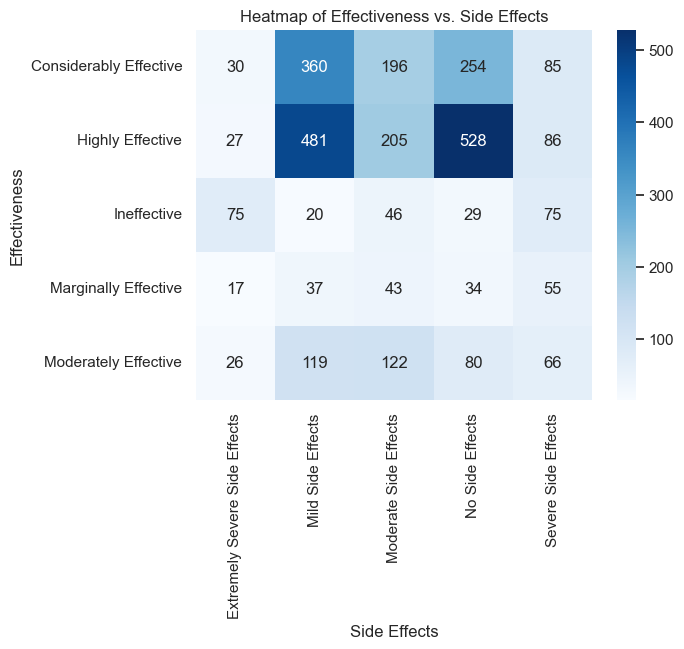

In [16]:
# Creating a contingency table
contingency_table = pd.crosstab(drugdatatrain['effectiveness'], drugdatatrain['sideEffects'])

# Plotting the heatmap
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')

# Adding labels and title
plt.xlabel('Side Effects')
plt.ylabel('Effectiveness')
plt.title('Heatmap of Effectiveness vs. Side Effects')

plt.show()